In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import DataFrame as df
import sklearn as skl

#step 1 done

In [3]:
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler as st

In [4]:
from sklearn.model_selection import KFold as kf
from sklearn.model_selection import cross_val_score as cvs
from sklearn.linear_model import LinearRegression as lr
from sklearn.linear_model import Lasso as L
from sklearn.linear_model import ElasticNet as EN
from sklearn.tree import DecisionTreeRegressor as dtr
from sklearn.neighbors import KNeighborsRegressor as knn
from sklearn.ensemble import GradientBoostingRegressor as gbr
from sklearn.svm import SVR as svr

In [5]:
from sklearn import model_selection as mods

In [6]:
from sklearn.metrics import mean_squared_error, r2_score as r2

In [7]:
data = pd.read_csv(r"C:\Users\TISYAGUPTA PYNE\Desktop\housing_task4.csv", header = None, names=[ 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'], delim_whitespace=True)

In [8]:
data.dropna(inplace=True)

In [9]:
dat=df(data)

In [10]:
dat
#step 2 begin

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [13]:
arr=dat.values

arr

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 3.9690e+02, 4.9800e+00,
        2.4000e+01],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 3.9690e+02, 9.1400e+00,
        2.1600e+01],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 3.9283e+02, 4.0300e+00,
        3.4700e+01],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 3.9690e+02, 5.6400e+00,
        2.3900e+01],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 3.9345e+02, 6.4800e+00,
        2.2000e+01],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 3.9690e+02, 7.8800e+00,
        1.1900e+01]])

In [14]:
x=arr[:,0:15]
y=arr[:, 13]

In [15]:
#scaling data
#from sklearn.preprocessing import MinMaxScaler as mns (this was used)
#module not functioning properly

scale=MinMaxScaler(feature_range = (0, 1))
rx=scale.fit_transform(x)

np.set_printoptions(precision=3)
print(rx[0:1,:])

[[0.    0.18  0.068 0.    0.315 0.578 0.642 0.269 0.    0.208 0.287 1.
  0.09  0.422]]


In [25]:
#validation

val_size= 0.2
seed = 3
x_train, x_val, y_train, y_val= mods.train_test_split(rx, y, test_size=val_size, random_state=seed)

In [26]:
num_folds=3
seed =1
scoring='r2'

In [27]:
models=[('LR', lr()), ('Lasso', L()), ('ElasticNet', EN()), ('KNN', knn()), ('CART', dtr()), ("SVR", svr())]

In [28]:
result=[]
names=[]

for name, model in models:
    kfold= kf(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_res=cvs(model, x_train, y_train, cv=kfold, scoring = scoring)
    result.append(cv_res)
    names.append(name)
    
    msg= "%s : %f (%f)" % (name, cv_res.mean(), cv_res.std())
    print (msg)

LR : 1.000000 (0.000000)
Lasso : 0.716720 (0.024288)
ElasticNet : 0.233554 (0.013299)
KNN : 0.806201 (0.057721)
CART : 0.997325 (0.001173)
SVR : 0.738092 (0.040655)


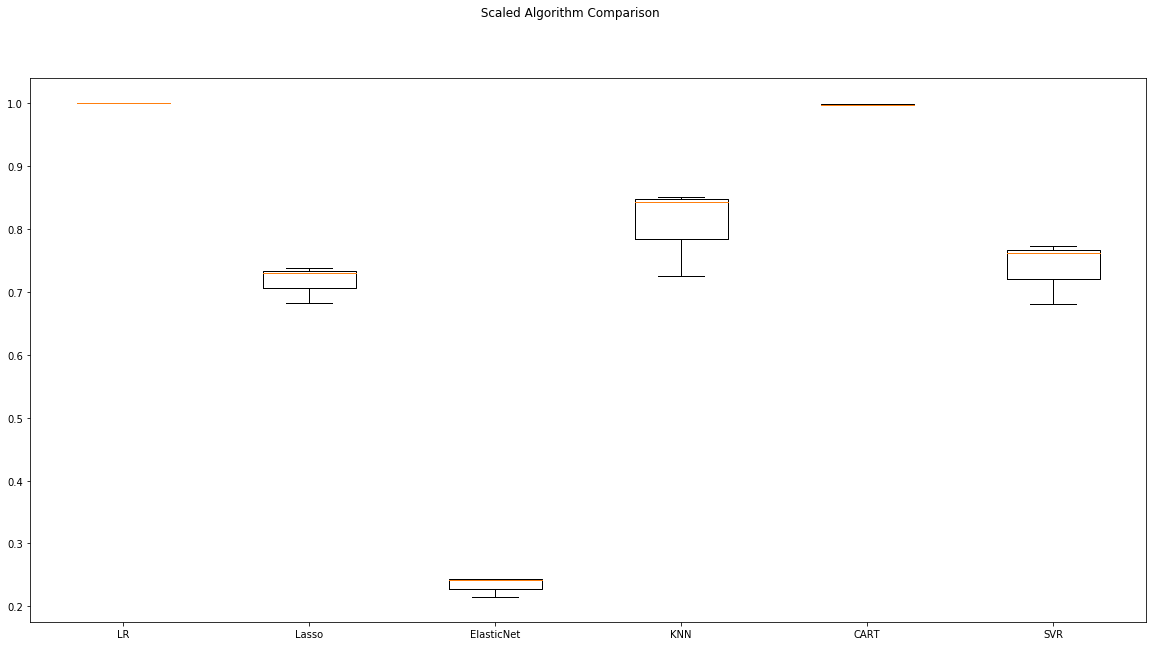

In [29]:
fig = plt.figure()
fig.suptitle(' Scaled Algorithm Comparison ')
ax = fig.add_subplot(111)
plt.boxplot(result)
ax.set_xticklabels(names)
plt.show()

plt.rcParams['figure.figsize']=(20,10)

#algorithm comparison

In [32]:
model = dtr(max_depth=20)
model.fit(x_train, y_train)

predictions = model.predict(x_val)
print(r2(y_val, predictions))

0.9993614493012546


In [33]:
scaler = st().fit(x_train)
rescaledx = scaler.transform(x_train)
model = gbr(random_state=seed, n_estimators=100)
model.fit(rescaledx, y_train)

rescaledValidationx = scaler.transform(x_val)
predictions = model.predict(rescaledValidationx)
print(r2(y_val, predictions))

0.9996833235019678


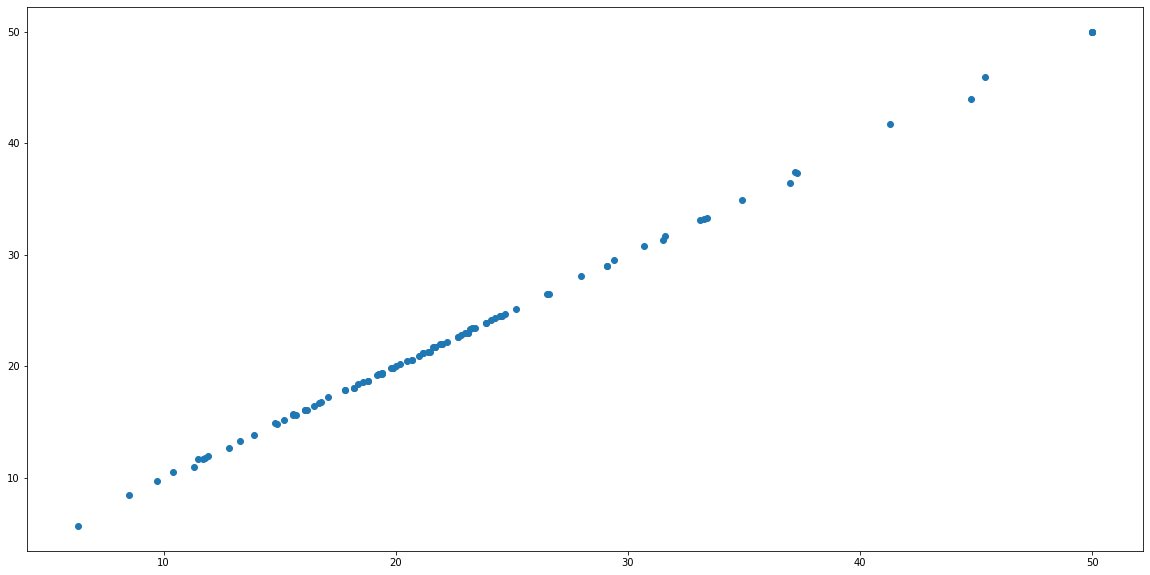

In [35]:
#extraas please ignore after this point

plt.scatter(y_val, predictions)

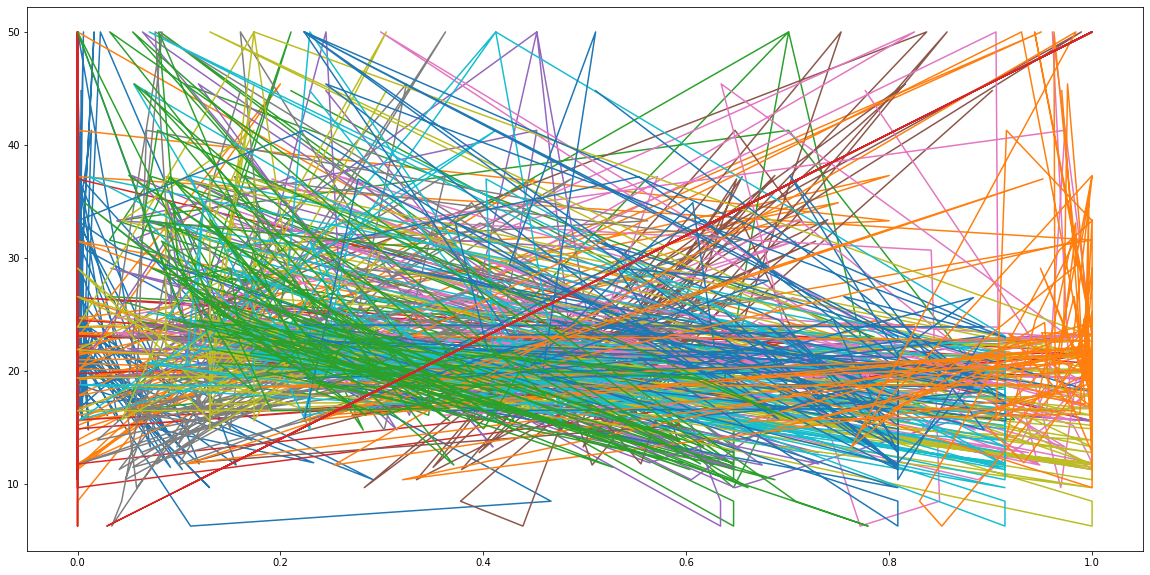

In [40]:
plt.plot(x_val, y_val)

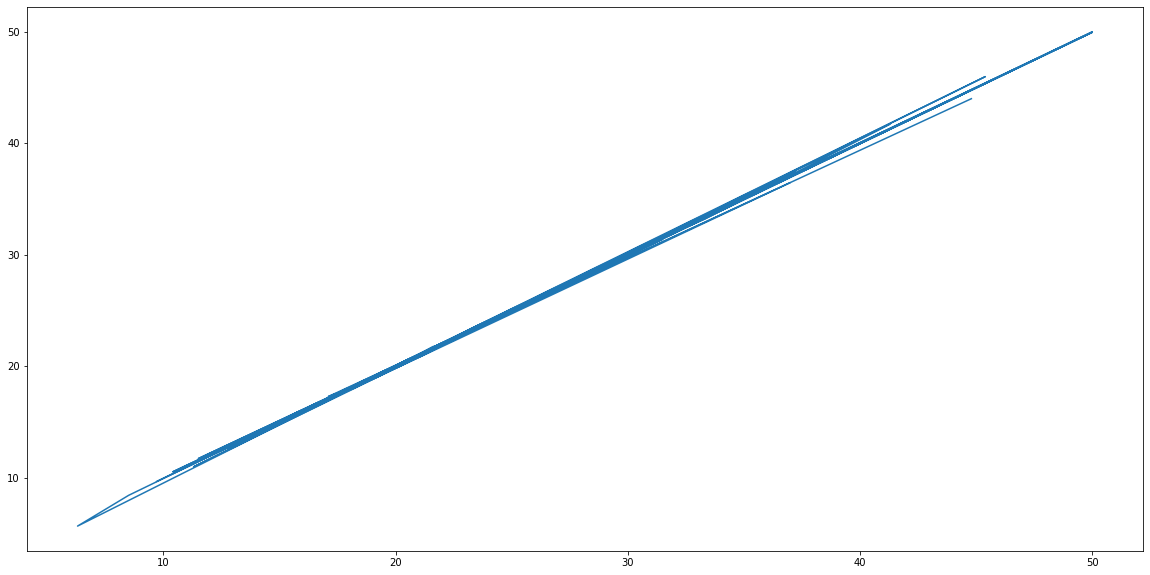

In [37]:
plt.plot(y_val,predictions)